# 7.1 Negentropy is scale-invariant (4 points)

The differential entropy of a n-dimensional random vector x with probability density p(x) is
defined as   $$H(X)=-\int_{\Re^{2}}p(x)log p(x) dx$$ The negentropy is defined as $$J(X)=H(X_{Gauss})-H(X) $$ where $X_{Gauss}$ is a n-dimensional multivariate Gaussian random vector with the same covariance matrix as X. Show that the negentropy is invariant w.r.t invertible linear transformations $y=Ax,$ i.e. $$J(Ax)=J(x)$$ from which it follows that the negentropy is scale-invariant. Use that the differential entropy of a multivariate n-dimensional Gaussian random vector x with covariance matrix $\sum$ has the form $$H(X_{Gauss})=\frac{1}{2}log|det\sum|+ \frac{n}{2}(1+log 2\pi )$$ Remark：the differential entropy itself is not scale-invariant.

## Answer:


To show: $$J(AX)=J(X)$$ $$y=AX$$ Transformation of random variable $$p_{y}(y)=p_{x}(x){\frac {1}{|det(J_y)|}} \qquad J_y=A$$
so $$p_{y}(y)=p_{x}(x){\frac {1}{|det(A)|}} \qquad (1)$$ 
$$H(y)=-\int_{\Re^{2}}p_{y}(y)log p_{y}(y) dy$$
Insert (1) :$$H(y)=-\int_{\Re^{2}}\frac{p_{x}(x)}{|det(A)|}log \frac{p_{x}(x)}{|det(A)|}|det(A)| dx$$ 
$$=-\int_{\Re^{2}}p_{x}(x)log \frac{p_{x}(x)}{|det(A)|} dx$$  
$$=-\int_{\Re^{2}}p_{x}(x)log p_{x}(x)dx+log|det(A)|$$   
so $$H(AX)=H(y)=H(X)+log|det(A)| \qquad (2) $$ 
$$\sum_{y}=E[AXX^TA^T]=E[AX]E[X^TA^T]=A\sum_{x}A^T \qquad (3)$$ 
$$ H(y_{Gauss})=\frac{1}{2}log|det\sum_{y}|+\frac{n}{2}(1+log(2\pi)) $$ 
insert (3):$$=\frac{1}{2}log|det(A\sum_{x}A^T)|+\frac{n}{2}(1+log(2\pi))$$ 
$$=\frac{1}{2}log|det\sum_{x}|+log(det(A))+\frac{n}{2}(1+log(2\pi)) \qquad (4)$$
$$J(AX)=J(y)=H(y_{Gauss})-H(y)$$ 
insert (2) (4):$$J(AX)=\frac{1}{2}log|det\sum_{x}|+log(det(A))+\frac{n}{2}(1+log(2\pi))-H(X)-log|det(A)|$$ 
$$=\frac{1}{2}log|det\sum_{x}|+\frac{n}{2}(1+log(2\pi))-H(X)$$ 
$$=H(X_{Gauss})-H(X)=J(X)$$


# 7.2 fastICA vs. Infomax (2 points)


Apply fastICA to the two soundfiles data set (once again) of problem sheet 6 and compare
runtime and robustness w.r.t. the mixing matrix A with the Infomax-based ICA-algorithm.
Use the following setup for the latter algorithm: natural gradient, Bell-Sejnowski amplitude
normalization, learning rate schedule "0 = 0:01, "t+1 = 0:9999"t.
1

In [32]:
import numpy as np
from sklearn.decomposition import FastICA
import timeit

In [29]:
s1 = np.fromfile('sound1.dat', dtype=float, sep='\n')
s2 = np.fromfile('sound2.dat', dtype=float, sep='\n')
s=np.concatenate((s1[np.newaxis,:],s2[np.newaxis,:]),0)
A = np.array([[4, 3], [2, 1]])  # Mixing matrix
S=np.dot(A,s)

In [34]:
ica = FastICA(whiten='True')# fun=G)
start = timeit.default_timer()
ica = ica.fit_transform(S)
stop = timeit.default_timer()
print stop-start

0.0410029888153



# 7.3 ICA on Image Patches (4 points)

The file imgpca.zip (used also in exercise sheet 2) contains three categories of images: nature,
buildings, and text (prefixes n,b,t). For each category:

(a) Sample P patches of $\sqrt{N}$ x  $\sqrt{N}$ pixels from all images of this category and rearrange each sample to a column vector. Choose number and size of the patches according to your computing resources. Recommended are P $\geq$ 20000 and N$\geq$ 144.

In [4]:
import matplotlib.image as mpimg
from sklearn.feature_extraction.image import extract_patches_2d, reconstruct_from_patches_2d
import matplotlib.pyplot as plt
%matplotlib inline

N = 256
N_sqrt = 16

In [5]:
# function to get Paches
def getPatches(cat, n=10, patch_size=(N_sqrt,N_sqrt), patches_per_img=2000):
    total_cols = patch_size[0]*patch_size[1]
    matrix = np.zeros((n*patches_per_img, total_cols))
    for i in range(n):
        img = mpimg.imread('./imgpca/%s%d.jpg'%(cat, i+1))
        str_idx = i*patches_per_img
        patches = extract_patches_2d(img, patch_size=patch_size, max_patches = patches_per_img )
        matrix[ str_idx:str_idx+patches_per_img, : ] = patches.reshape(patches_per_img, total_cols )
    return matrix                             

In [17]:
matrix_nature = getPatches('n',n=13)
matrix_building = getPatches('b')
matrix_text = getPatches('t',n=14)

#print(np.shape(matrix_nature))
#print(np.shape(matrix_building))
#print(np.shape(matrix_text))

(b) Calculate the independent features of the image patches (these are the columns of mixing matrix A). Use a fastICA toolbox to compute this matrix:
1.Let fastica perform PCA and whitening of the data.
2.Use the contrast function G($\widehat{s}$) =$\frac{1}{a}$ log cosh(a$\widehat{s}$) with a = 1.

In [8]:
from sklearn.decomposition import FastICA

# G needs to return the Function G and its derivate.
def G(s):
    return np.log(np.cosh(s)), np.tanh(s)

ica = FastICA(whiten='True')# fun=G)

#apply to the different images
nature_ica = ica.fit_transform(matrix_nature.T)
nature_ica = nature_ica.reshape((N_sqrt, N_sqrt, -1))
print("nature_ica finished")

building_ica = ica.fit_transform(matrix_building.T)
building_ica = building_ica.reshape((N_sqrt, N_sqrt, -1))
print("building_ica finished")

text_ica = ica.fit_transform(matrix_text.T)
text_ica = text_ica.reshape((N_sqrt, N_sqrt, -1))
print("text_ica finished")


nature_ica finished
building_ica finished
text_ica finished


(c) Show the first 20 independent features as (grayscale) image patches by rearranging the vectors into$\sqrt{N}$ x  $\sqrt{N}$ matrices and compare the results for the different categories. Order the independent features by decreasing negentropy, (such that the first feature has largest (approximated) negentropy etc).

In [27]:
# TODO: Order by decreasing negentropy/
def show_images(im_ica, name=''):
    plt.figure(figsize=(8,8))
    for i in np.arange(20):
        plt.subplot(4,5,1+i)
        plt.imshow(im_ica[:,:,i], cmap='gray')
        plt.title(name)

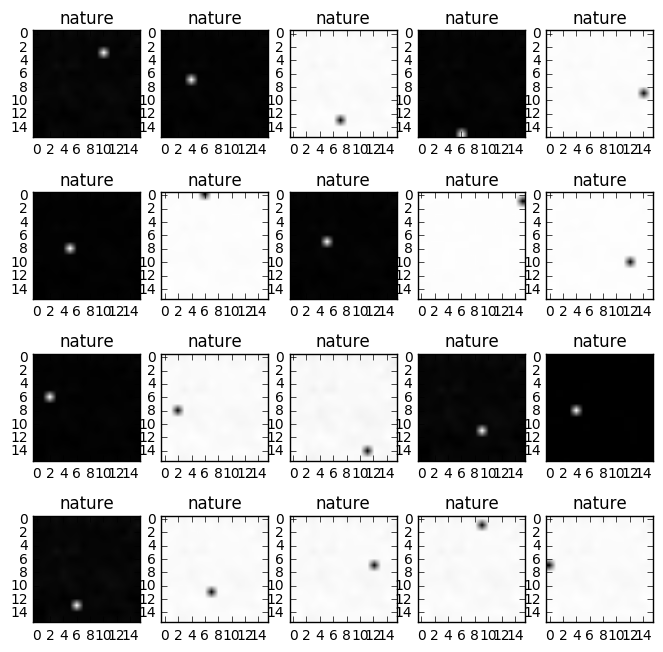

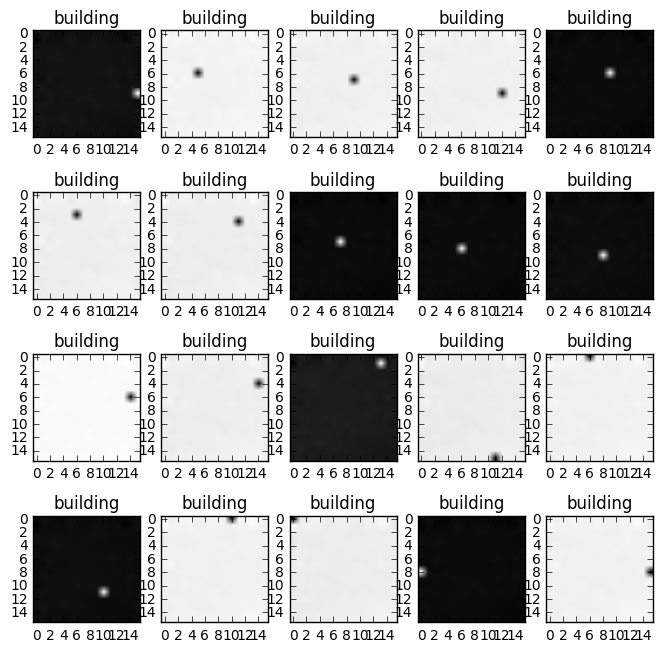

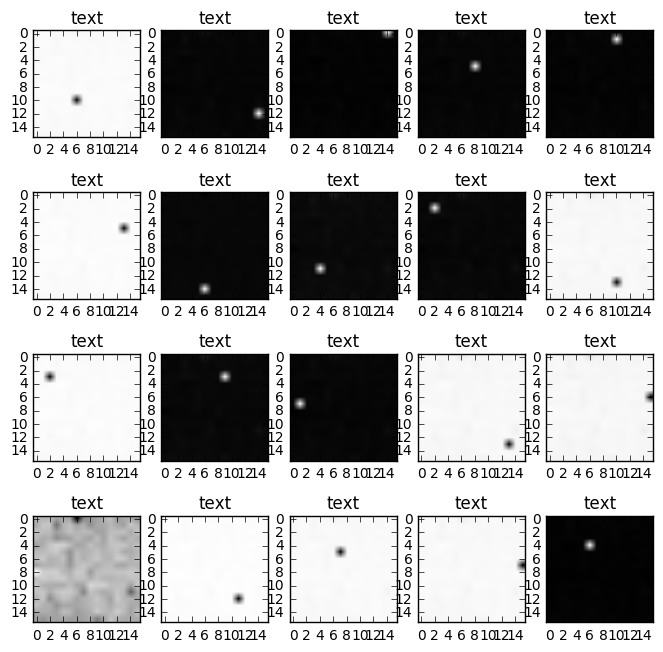

In [28]:
show_images(nature_ica,"nature")
show_images(building_ica,"building")
show_images(text_ica,"text")

(d) Perform PCA on the same set of patches, plot the the principal components (ordered by decreasing eigenvalue) as in (c) and compare them with the independent features.

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
nature_pca = pca.fit_transform(matrix_nature.T).reshape((N_sqrt, N_sqrt, -1))
building_pca = pca.fit_transform(matrix_building.T).reshape((N_sqrt, N_sqrt, -1))
text_pca = pca.fit_transform(matrix_text.T).reshape((N_sqrt, N_sqrt, -1))

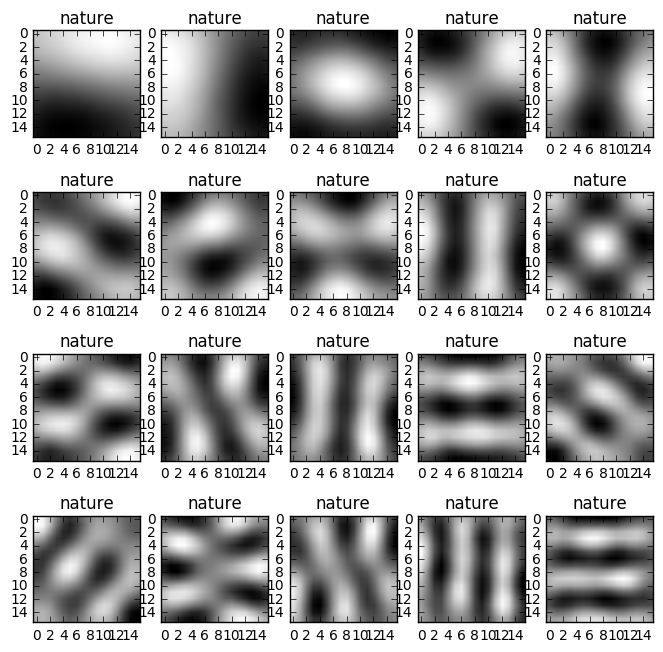

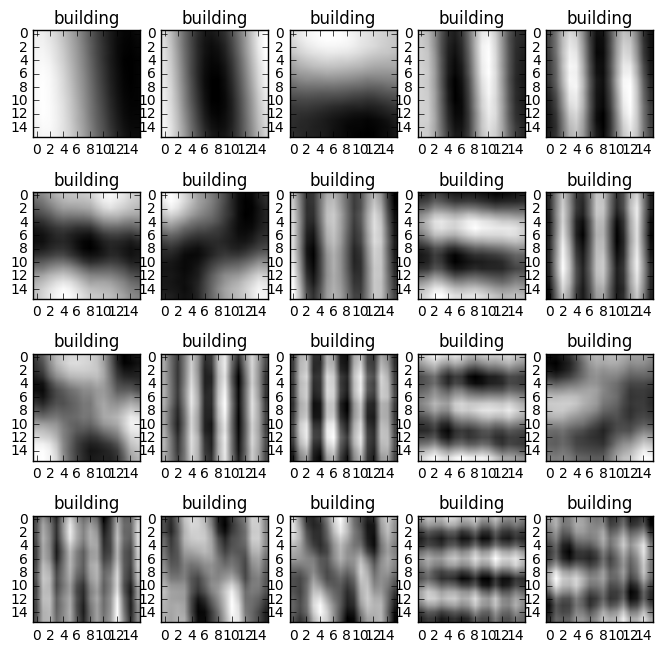

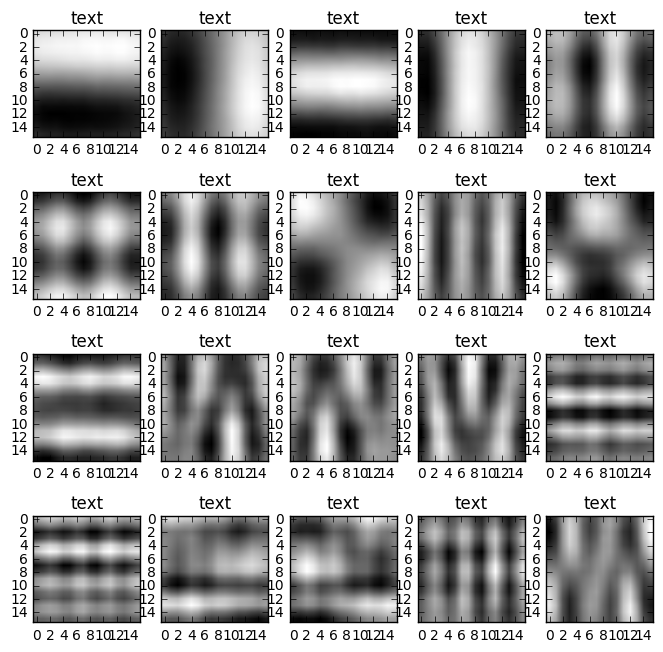

In [14]:
show_images(nature_pca,'nature')
show_images(building_pca,'building')
show_images(text_pca,'text')